In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
company=pd.read_csv(r"C:\Users\VIRAJ KAMAT\Desktop\Data Science\Assignments\Decision Trees\Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company.shape

(400, 11)

In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


We have to Build decision tree with target variable sales. so we need to convert the sales feature into categorical data type.

In [5]:
company=pd.get_dummies(company)

In [6]:
company['Sales']=pd.cut(company['Sales'], 
                        bins=[0,10, np.inf], 
                        labels=['Low/Mid','High'],
                        include_lowest=True)

In [7]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,Low/Mid,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,High,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,High,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,Low/Mid,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,Low/Mid,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [8]:
x=company.iloc[:,1:]
y=company.iloc[:,0]

In [9]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [10]:
y

0      Low/Mid
1         High
2         High
3      Low/Mid
4      Low/Mid
        ...   
395       High
396    Low/Mid
397    Low/Mid
398    Low/Mid
399    Low/Mid
Name: Sales, Length: 400, dtype: category
Categories (2, object): ['Low/Mid' < 'High']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)

## Building Decision Tree Classifier using Entropy Criteria

## Iteration1: Max Depth = 2

In [12]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=2)
model1.fit(x_train,y_train)
preds1=model1.predict(x_test)

print('Model leaves:',model1.get_n_leaves(),'\n','\n',
      pd.Series(preds1).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds1==y_test))

Model leaves: 4 
 
 Low/Mid    81
High       19
dtype: int64 
 
 Model Accuracy is: 0.82


## Iteration2: Max Depth = 3

In [13]:
model2=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model2.fit(x_train,y_train)
preds2=model2.predict(x_test)

print('Model leaves:',model2.get_n_leaves(),'\n','\n',
      pd.Series(preds2).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds2==y_test))

Model leaves: 7 
 
 Low/Mid    81
High       19
dtype: int64 
 
 Model Accuracy is: 0.76


## Iteration3: Max Depth = 4

In [14]:
model3=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model3.fit(x_train,y_train)
preds3=model3.predict(x_test)

print('Model leaves:',model3.get_n_leaves(),'\n','\n',
      pd.Series(preds3).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds3==y_test))

Model leaves: 12 
 
 Low/Mid    81
High       19
dtype: int64 
 
 Model Accuracy is: 0.8


## Iteration4: Max Depth = 5

In [15]:
model4=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model4.fit(x_train,y_train)
preds4=model4.predict(x_test)

print('Model leaves:',model4.get_n_leaves(),'\n','\n',
      pd.Series(preds4).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds4==y_test))

Model leaves: 18 
 
 Low/Mid    78
High       22
dtype: int64 
 
 Model Accuracy is: 0.81


## Iteration5: Max Depth = 6

In [16]:
model5=DecisionTreeClassifier(criterion='entropy',max_depth=6)
model5.fit(x_train,y_train)
preds5=model5.predict(x_test)

print('Model leaves:',model5.get_n_leaves(),'\n','\n',
      pd.Series(preds5).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds5==y_test))

Model leaves: 24 
 
 Low/Mid    82
High       18
dtype: int64 
 
 Model Accuracy is: 0.83


## Iteration6: Max Depth = 7

In [17]:
model6=DecisionTreeClassifier(criterion='entropy',max_depth=7)
model6.fit(x_train,y_train)
preds6=model6.predict(x_test)

print('Model leaves:',model6.get_n_leaves(),'\n','\n',
      pd.Series(preds6).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds6==y_test))

Model leaves: 28 
 
 Low/Mid    83
High       17
dtype: int64 
 
 Model Accuracy is: 0.82


## Hence, the classifier model at the end of iteration 5 has the max accuracy i.e. 84%

In [18]:
print(classification_report(preds5,y_test))

              precision    recall  f1-score   support

        High       0.53      0.56      0.54        18
     Low/Mid       0.90      0.89      0.90        82

    accuracy                           0.83       100
   macro avg       0.71      0.72      0.72       100
weighted avg       0.83      0.83      0.83       100



## Building Decision Tree Classifier (CART) using Gini Criteria

In [19]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=6)
model_gini.fit(x_train, y_train)
predG=model_gini.predict(x_test)
print('Model Accuracy is:',np.mean(predG==y_test))

Model Accuracy is: 0.83


## Same Accuracy is achieved using CART as well

## Visualization of both the Decision Trees

In [20]:
from sklearn import tree

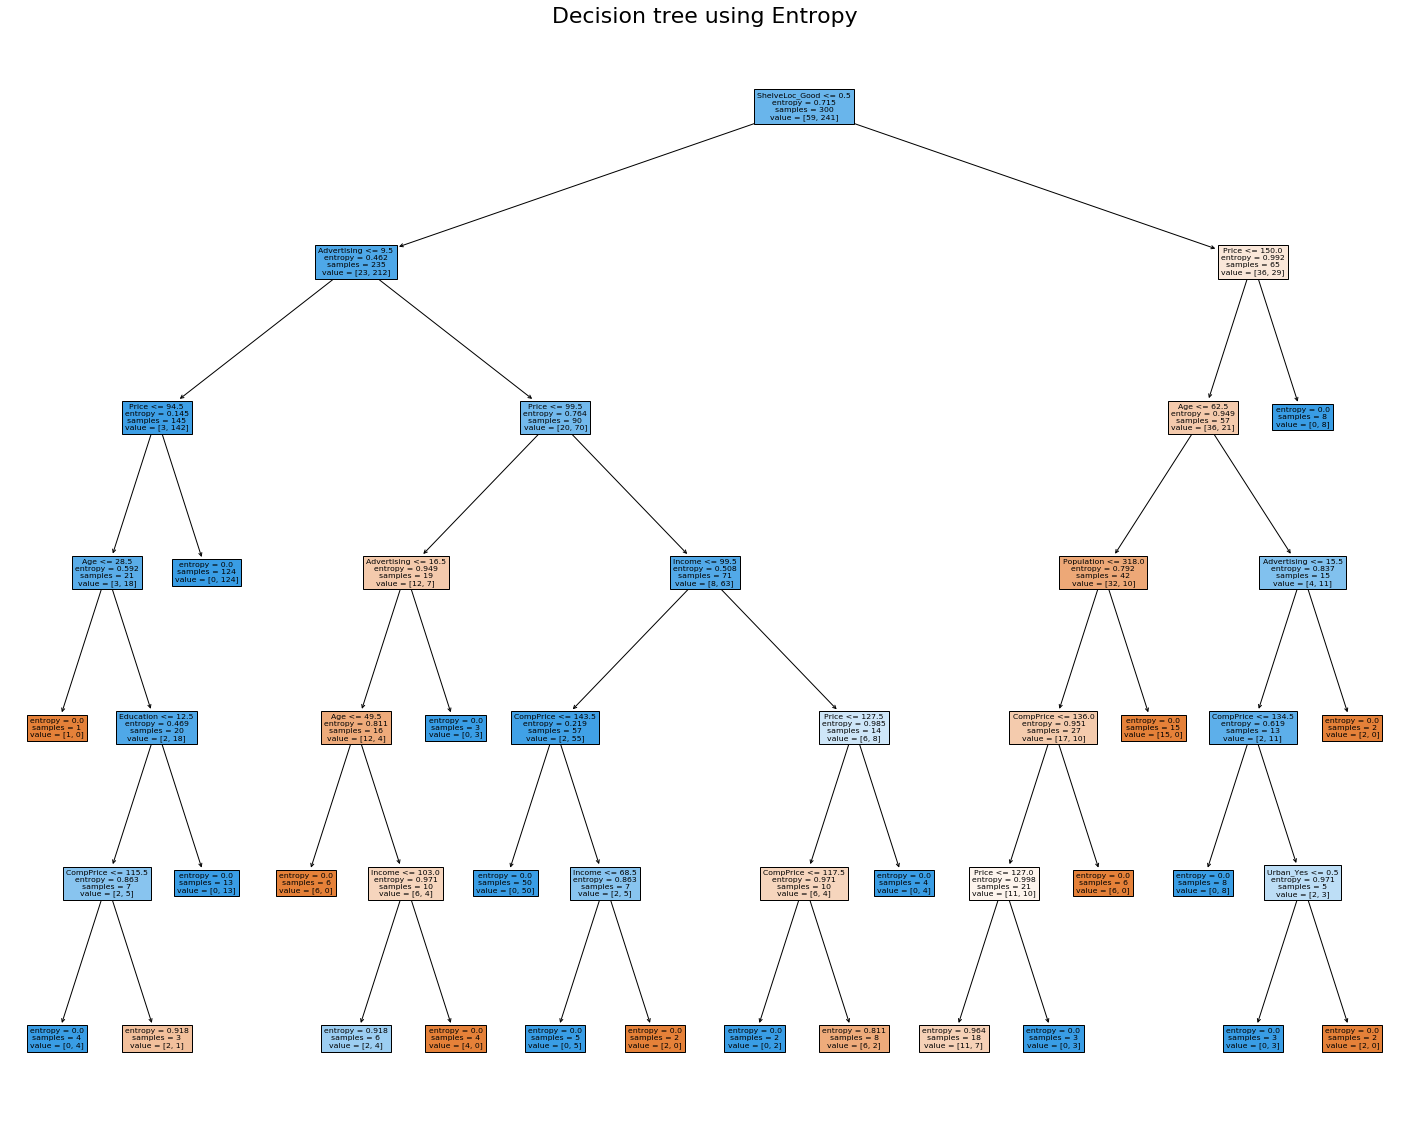

In [21]:

fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model5,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price','Age','Education',
                     'ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No',
                     'US_Yes'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)
plt.savefig('DT_Entropy.png')

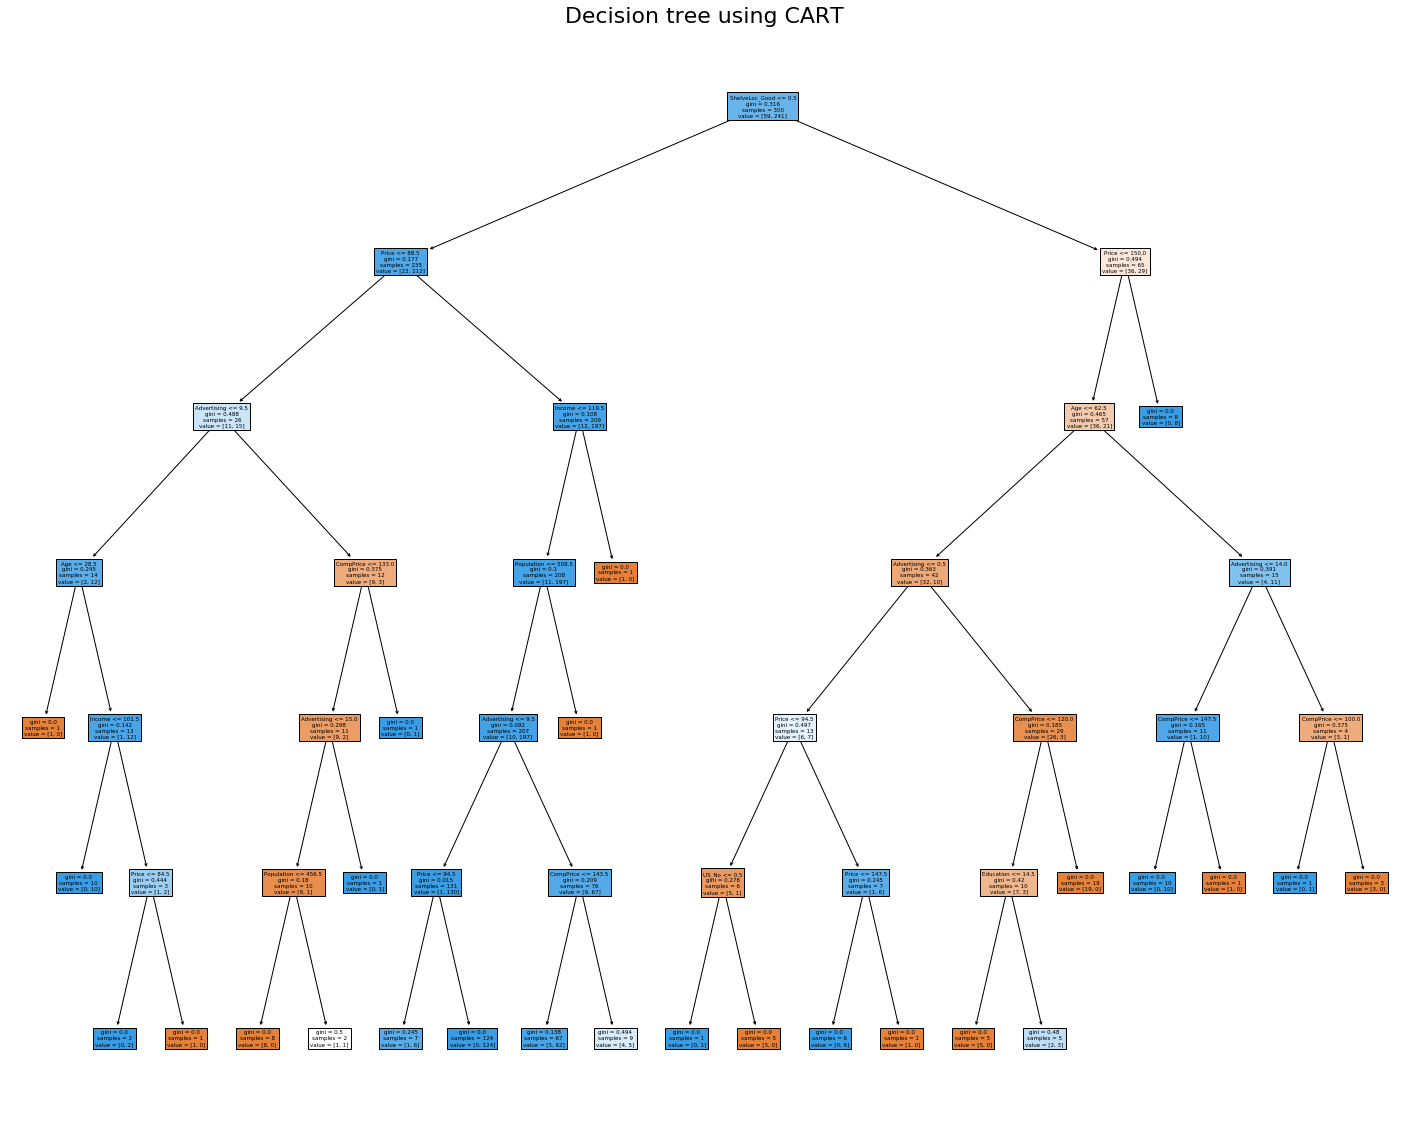

In [22]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price','Age','Education',
                     'ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No',
                     'US_Yes'], filled=True)
plt.title('Decision tree using CART',fontsize=22)
plt.savefig('DT_Cart.png')

## After combining the insights from both the plots, we can say that following are the 3 top factors affecting the sales:
1. Shelf Location at stores
2. Pricing
3. Advertising